# 1.데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

## 총 4개의 데이터 파일 불러오기

In [2]:
# 고객 사용 데이터
use_log = pd.read_csv('use_log.csv')
use_log.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [3]:
#고객데이터
customer= pd.read_csv('customer_master.csv')
customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [4]:
# class 종류 데이터
class_master = pd.read_csv('class_master.csv')
class_master.head()

,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [5]:
# 할인 데이터
campaign_master  = pd.read_csv('campaign_master.csv')
campaign_master.head()

,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


In [6]:
print(len(use_log))
print(len(customer))
print(len(class_master))
print(len(campaign_master))

197428
4192
3
3


# 2. 데이터 가공

In [7]:
# 고객 데이터와 class 데이터를 병합하여 확인
customer_join = pd.merge(customer, class_master, on='class', how='left')
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000
...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0,2_야간,6000
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500


In [8]:
# 병합된 고객 데이터와 할인 데이터를 병합하여 확인
customer_join = pd.merge(customer_join, campaign_master, on='campaign_id', how='left')

In [10]:
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0,2_야간,6000,2_일반
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반


In [11]:
# 결측치 확인
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64


<AxesSubplot:xlabel='class_name'>

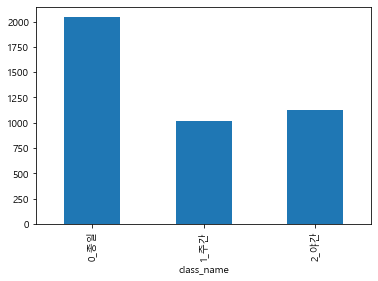

In [12]:
# claa 별로 고객 확인 결과 종일반이 많은 것을 알 수 있음
plt.rc('font', family='Malgun Gothic')
print(customer_join.groupby('class_name')['customer_id'].count())
customer_join.groupby('class_name')['customer_id'].count().plot(kind='bar') 

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: customer_id, dtype: int64


<AxesSubplot:xlabel='campaign_name'>

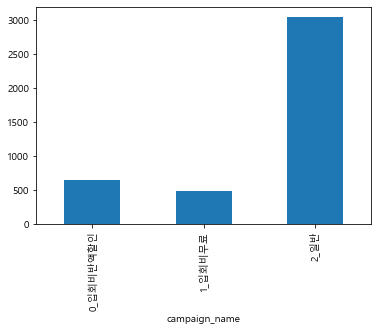

In [13]:
# 할인 종류 별로 고객 데이터 확인 결과 일반 회원이 압도적으로 많은 것을 알 수 있음,
# 즉, 할인은 고객 등록에 크게 기여하지 않는 것을 알 수 있음
print(customer_join.groupby('campaign_name')['customer_id'].count())
customer_join.groupby('campaign_name')['customer_id'].count().plot(kind='bar') 

gender
F    1983
M    2209
Name: customer_id, dtype: int64


<AxesSubplot:xlabel='gender'>

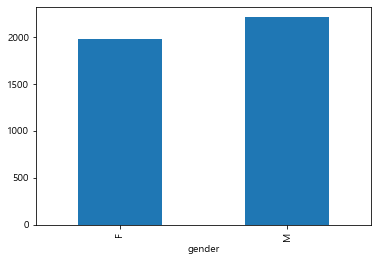

In [14]:
# 성별에 따른 고객 데이터 확인, 남여 거의 동등함
print(customer_join.groupby('gender')['customer_id'].count())
customer_join.groupby('gender')['customer_id'].count().plot(kind='bar')

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64


<AxesSubplot:xlabel='is_deleted'>

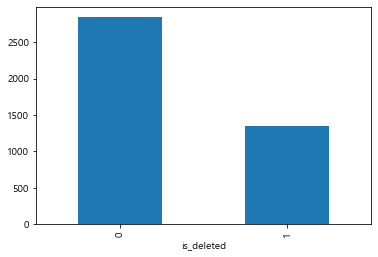

In [15]:
#0 현재 가입한인원 , 1 탈퇴한 인원 ,가입 유지한 인원이 더 많음
print(customer_join.groupby('is_deleted')['customer_id'].count())
customer_join.groupby('is_deleted')['customer_id'].count().plot(kind='bar')

In [16]:
# 등록한 날짜의 타입이 object로 되어 있어서 datetime으로 변경
customer_join['start_date']=pd.to_datetime(customer_join['start_date'])

In [17]:
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,2_야간,6000,2_일반
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반
4188,HD246549,XXXXX,C01,F,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반
4189,GD037007,XXXXX,C03,M,2019-03-14,NaN,CA1,0,2_야간,6000,2_일반
4190,OA953150,XXXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반


In [18]:
# 2018년 4월 1일 이후에 등록한 인원 수 확인
len(customer_join.loc[customer_join['start_date'] >= pd.to_datetime('20180401')])

1376

In [19]:
# 등록 마지막 날짜의 데이터 타입변환(현재도 등록되어 있으면 NaT로 표시)
customer_join['end_date'] = pd.to_datetime(customer_join['end_date'])

In [20]:
# 최근월 (2019년 3월) 고객 데이터 파악
customer_newer=customer_join.loc[(customer_join['end_date'] >= pd.to_datetime('20190331')) | (customer_join['end_date'].isna())]
len(customer_newer)

2953

In [21]:
customer_newer['end_date'].unique()

array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

class_name
0_종일    1444
1_주간     696
2_야간     813
Name: customer_id, dtype: int64


<AxesSubplot:xlabel='class_name'>

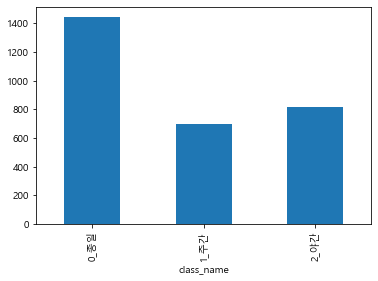

In [22]:
#최근에 등록을 유지한 고객도 종일반이 가장 많음
print(customer_newer.groupby('class_name')['customer_id'].count())
customer_newer.groupby('class_name')['customer_id'].count().plot(kind='bar')

In [25]:
#일반 회원이 전체 회원의 81% 이상을 차지
print(customer_newer.groupby('campaign_name')['customer_id'].count())
print('일반 회원 비율:', customer_newer.groupby('campaign_name')['customer_id'].count()[2] / len(customer_newer) * 100)

campaign_name
0_입회비반액할인     311
1_입회비무료       242
2_일반         2400
Name: customer_id, dtype: int64
일반 회원 비율: 81.27328140873688


In [26]:
# 성별의 차이는 크게 없음
customer_newer.groupby('gender')['customer_id'].count()

gender
F    1400
M    1553
Name: customer_id, dtype: int64

In [27]:
customer_newer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,2_야간,6000,2_일반
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반


In [28]:
#고객 이용 데이터 확인
use_log 

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01
...,...,...,...
197423,L00000049209753,TS977703,2019-03-31
197424,L00000049209754,TS979550,2019-03-31
197425,L00000049209755,TS995299,2019-03-31
197426,L00000049209756,TS995853,2019-03-31


In [30]:
# 고객 이용 데이터의 사용 날짜를 월별로 확인
use_log['usedate'] = pd.to_datetime(use_log['usedate'])
use_log['연월'] = use_log['usedate'].dt.strftime('%Y%m')
use_log

,log_id,customer_id,usedate,연월
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804
...,...,...,...,...
197423,L00000049209753,TS977703,2019-03-31,201903
197424,L00000049209754,TS979550,2019-03-31,201903
197425,L00000049209755,TS995299,2019-03-31,201903
197426,L00000049209756,TS995853,2019-03-31,201903


In [31]:
use_log_month = use_log.groupby(['연월', 'customer_id'],as_index=False).count()

In [32]:
use_log_month.rename(columns={'log_id' : 'count'}, inplace=True)
use_log_month

,연월,customer_id,count,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7
...,...,...,...,...
36837,201903,TS995853,8,8
36838,201903,TS998593,8,8
36839,201903,TS999079,3,3
36840,201903,TS999231,6,6


In [33]:
del use_log_month['usedate']
use_log_month.head() # 월별로 고객들이 얼마나 이용하는지 확인

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [34]:
# 고개들의 월별 이용 통계랑
use_log_customer = use_log_month.groupby('customer_id')['count'].agg(['mean','median','max','min'])
use_log_customer = use_log_customer.reset_index(drop=False)
use_log_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


In [35]:
# 월별로 주말에 많이 오는지 평일에 많이 오는지 확ㅇ니
use_log['weekday'] = use_log['usedate'].dt.weekday
use_log

,log_id,customer_id,usedate,연월,weekday
0,L00000049012330,AS009373,2018-04-01,201804,6
1,L00000049012331,AS015315,2018-04-01,201804,6
2,L00000049012332,AS040841,2018-04-01,201804,6
3,L00000049012333,AS046594,2018-04-01,201804,6
4,L00000049012334,AS073285,2018-04-01,201804,6
...,...,...,...,...,...
197423,L00000049209753,TS977703,2019-03-31,201903,6
197424,L00000049209754,TS979550,2019-03-31,201903,6
197425,L00000049209755,TS995299,2019-03-31,201903,6
197426,L00000049209756,TS995853,2019-03-31,201903,6


In [38]:
use_log_weekday = use_log.groupby(['customer_id','연월','weekday'], as_index=False)['log_id'].count()

In [39]:
use_log_weekday.rename(columns = {'log_id' : 'count'}, inplace = True)
use_log_weekday.head()

,customer_id,연월,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [40]:
# 정기적으로 이용하는 고객에게 flg 설정
use_log_weekday=use_log_weekday.groupby('customer_id', as_index=False)[['customer_id','count']].max()

In [41]:
use_log_weekday['routine_flg'] = 0 # 전제 0으로 설정
#방문횟수가 4 미만인 경우에는 0을 그대로 두고, 4이상인 경우에 1을 대입
use_log_weekday['routine_flg'] = use_log_weekday['routine_flg'].where(use_log_weekday['count']<4, 1) 
use_log_weekday

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1
...,...,...,...
4187,TS995853,5,1
4188,TS998593,5,1
4189,TS999079,5,1
4190,TS999231,5,1


In [42]:
customer_join = pd.merge(customer_join, use_log_customer, on='customer_id', how='left')

In [43]:
customer_join=pd.merge(customer_join, use_log_weekday[['customer_id','routine_flg']], on='customer_id', how='left')
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,8.000000,8.0,8,8,0
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,10.000000,10.0,10,10,0
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,2_야간,6000,2_일반,8.000000,8.0,8,8,0
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,11.000000,11.0,11,11,0


In [44]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64

In [45]:
#회원 기간계산
from dateutil.relativedelta import relativedelta

In [46]:
customer_join['calc_date']=customer_join['end_date']

In [47]:
# 회원기간은 start_date와 end_date의 차이. 단, 2019년 3월 까지 탈퇴하지 않은 회원은 결측치기 때문에 차이 계산을 위해 2019년4월30일로 대체
customer_join['calc_date'] = customer_join['calc_date'].fillna(pd.to_datetime('20190430'))
customer_join['calc_date']

0      2019-04-30
1      2019-04-30
2      2019-04-30
3      2019-04-30
4      2019-04-30
          ...    
4187   2019-04-30
4188   2019-04-30
4189   2019-04-30
4190   2019-04-30
4191   2019-04-30
Name: calc_date, Length: 4192, dtype: datetime64[ns]

In [48]:
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,8.000000,8.0,8,8,0,2019-04-30
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,10.000000,10.0,10,10,0,2019-04-30
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,2_야간,6000,2_일반,8.000000,8.0,8,8,0,2019-04-30
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,11.000000,11.0,11,11,0,2019-04-30


In [49]:
customer_join['membership_period'] = 0

In [50]:
delta = relativedelta(customer_join['calc_date'].iloc[0], customer_join['start_date'].iloc[0])

In [51]:
delta.years *12  + delta.months

47

In [53]:
pd.set_option('mode.chained_assignment',  None) #SettingWithCopyWarning 경고 무시
#회원기간 각 행별 계산
for i in range(len(customer_join)):
    delta = relativedelta(customer_join['calc_date'].iloc[i], customer_join['start_date'].iloc[i])
    customer_join['membership_period'].iloc[i] = delta.years * 12 + delta.months

customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


In [54]:
customer_join.tail()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,8.0,8.0,8,8,0,2019-04-30,1
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,10.0,10.0,10,10,0,2019-04-30,1
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,2_야간,6000,2_일반,8.0,8.0,8,8,0,2019-04-30,1
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,11.0,11.0,11,11,0,2019-04-30,1
4191,IK692635,XXXXX,C02,F,2019-03-15,NaT,CA1,0,1_주간,7500,2_일반,10.0,10.0,10,10,0,2019-04-30,1


In [55]:
customer_join.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000
mean,0.322042,8559.875954,5.333127,5.250596,7.823950,3.041269,0.814170,18.835878
std,0.467315,1968.128971,1.777533,1.874874,2.168959,1.951565,0.389016,13.848148
min,0.000000,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,0.000000,6000.000000,4.250000,4.000000,7.000000,2.000000,1.000000,7.000000
50%,0.000000,7500.000000,5.000000,5.000000,8.000000,3.000000,1.000000,15.000000
75%,1.000000,10500.000000,6.416667,6.500000,9.000000,4.000000,1.000000,30.000000
max,1.000000,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [56]:
customer_join.groupby('routine_flg')['customer_id'].count()  # 정기적으로 이용하는 회원이 많음

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

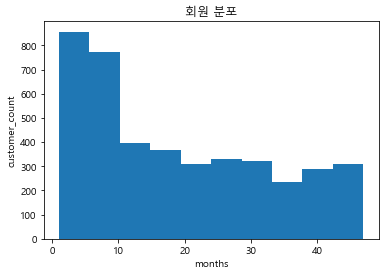

In [57]:
plt.hist(customer_join['membership_period'])
plt.xlabel('months')
plt.ylabel('customer_count')
plt.title('회원 분포')
plt.show()

In [58]:
# 등록유지 회원과 탈퇴 회원 비교
customer_end = customer_join.loc[customer_join['is_deleted']==1]
customer_stay = customer_join.loc[customer_join['is_deleted'] ==0]

In [59]:
customer_end.describe().T

,count,mean,std,min,25%,50%,75%,max
is_deleted,1350.0,1.000000,0.000000,1.0,1.0,1.0,1.000000,1.0
price,1350.0,8595.555556,1949.163652,6000.0,6000.0,7500.0,10500.000000,10500.0
mean,1350.0,3.865474,1.246385,1.0,3.0,4.0,4.666667,9.0
median,1350.0,3.621852,1.270847,1.0,3.0,4.0,4.500000,9.0
max,1350.0,6.461481,2.584021,1.0,4.0,7.0,8.000000,13.0
min,1350.0,1.821481,0.976361,1.0,1.0,2.0,2.000000,8.0
routine_flg,1350.0,0.456296,0.498271,0.0,0.0,0.0,1.000000,1.0
membership_period,1350.0,8.026667,5.033692,1.0,4.0,7.0,11.000000,23.0


In [60]:
customer_stay.describe().T

,count,mean,std,min,25%,50%,75%,max
is_deleted,2842.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
price,2842.0,8542.927516,1977.189779,6000.000000,6000.000000,7500.000000,10500.00000,10500.0
mean,2842.0,6.030288,1.553587,3.166667,4.833333,5.583333,7.17803,12.0
median,2842.0,6.024279,1.599765,3.000000,5.000000,5.500000,7.00000,12.0
max,2842.0,8.471147,1.571048,5.000000,7.000000,8.000000,10.00000,14.0
min,2842.0,3.620690,2.030488,1.000000,2.000000,3.000000,5.00000,12.0
routine_flg,2842.0,0.984166,0.124855,0.000000,1.000000,1.000000,1.00000,1.0
membership_period,2842.0,23.970443,13.746761,1.000000,12.000000,24.000000,35.00000,47.0


In [61]:
customer_join.to_csv('customer_join.csv', index=False)